# Diabetes Prediction <=> DL-Model

### Load preprocessed data, Build,  Train, Evaluate Models and Deployement

In [1]:
## basic package
import pandas as pd
import numpy as np
import pickle

## Customized Function
from helpers import *

## Magic
%matplotlib inline
print("Libraries Imported ..")

Libraries Imported ..


## 1. Load Preprocessed Dataset

In [2]:
raw_data = pd.read_csv("../data/diabetes.csv")
cleaned_data = pd.read_csv("../data/clean_data.csv")
scaled_data = pd.read_csv("../data/scaled_data.csv")

print("raw_data Shape     :",raw_data.shape)
print("cleaned_data Shape :",cleaned_data.shape)
print("scaled_data Shape  :",scaled_data.shape)

raw_data Shape     : (768, 9)
cleaned_data Shape : (768, 9)
scaled_data Shape  : (768, 9)


### First rows raw data

In [3]:
raw_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### First rows cleaned data

In [4]:
scaled_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1


### First rows Scaled data

In [5]:
scaled_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1


### => Let use cleaned dataset 

In [6]:
df = cleaned_data

 ### 2. Splitting the data into training, testing, and validation sets

In [7]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome'] # dt.iloc[:,:9].values
y = df.loc[:, 'Outcome'] # dt.iloc[:,8:9].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
#pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              #"Validation": [X_val.shape, y_val.shape],
              #"Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target', 'Validation'])

# 3.  model

## 3.1. Build Model

In [9]:
pip install tensorflow==2.5.0

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


## 3.2.  Compile the model

In [12]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 3.3.  Model Training

In [13]:
from datetime import datetime
def training_time(start_time= None):
    """
    this code is to show how much time required to train the model 
    using different algorithms
    """
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
    
    print(f'\nTrianing Duration: {thour} hours {tmin} minutes and {round(tsec,2)} seconds.')

In [14]:
start_time=training_time(None)

history = model.fit(
    X_train, y_train, 
     validation_data=(X_val, y_val),
    epochs=100, batch_size=64)

training_time(start_time)

Epoch 1/100
8/8 [==============================] - 12s 56ms/step - loss: 2.6614 - accuracy: 0.5796 - val_loss: 2.3538 - val_accuracy: 0.4634
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7430 - accuracy: 0.5841 - val_loss: 2.1836 - val_accuracy: 0.5447
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6608 - accuracy: 0.5891 - val_loss: 1.3442 - val_accuracy: 0.4959
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0313 - accuracy: 0.5575 - val_loss: 1.3285 - val_accuracy: 0.4878
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.5919 - val_loss: 1.1855 - val_accuracy: 0.4878
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9426 - accuracy: 0.6147 - val_loss: 1.1937 - val_accuracy: 0.4797
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.6226 - val_loss: 1.3071 - val_accuracy: 0.5203
Epoch 8/100
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7174 - val_loss: 0.9620 - val_accuracy: 0.6260
Epoch 60/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7201 - val_loss: 0.8248 - val_accuracy: 0.5366
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.7229 - val_loss: 0.8327 - val_accuracy: 0.5772
Epoch 62/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6966 - val_loss: 0.9557 - val_accuracy: 0.6016
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7377 - val_loss: 0.8213 - val_accuracy: 0.5772
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7029 - val_loss: 0.8631 - val_accuracy: 0.5935
Epoch 65/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7141 - val_loss: 0.8851 - val_accuracy: 0.6098
Epoch 66/100
8/8 [===============

# 4. Model Evaluation

In [15]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## 4.1. Accuracy and Loss

In [16]:
def model_loss_acc(model, X_train, y_train, X_test, y_test):
    score_train = model.evaluate(X_train, y_train,  verbose=0)
    score_test  = model.evaluate(X_test, y_test,  verbose=0)
    train_acc = round(score_train[1]*100, 2)
    test_acc = round(score_test[1]*100, 2)
    train_loss = round(score_train[0]*100, 2)
    test_loss = round(score_test[0]*100, 2)
    gen = 100 - test_acc
    return pd.DataFrame({'Accuracy':[train_acc, test_acc], 
                  'Loss':[train_loss, test_loss]
                 }, index=['Training', 'Validation'])

In [17]:
model_loss_acc(model, X_train, y_train, X_test, y_test)

,Accuracy,Loss
Training,74.54,55.19
Validation,73.38,60.23


+ The accuracy is 91.85% and 78.57% on the training set and testing set respectively. 
+ **Meaning :** Our model is able to predict with ~80% accuracy whether that patient will develop diabetes within the next five years.

+ **Overfitting or Underfitting :**
> a

+ The remaining 19 predictions are false negatives and 14 other predictions are false positives, which are undesirable.

+ For diabetes prediction, a false negative is perhaps more damaging than a false positive. 

+ A false negative means telling the patient that they will not develop diabetes within the next five years, when in fact they would. 

+ Therefore, when we evaluate the performance of different models for predicting the onset of diabetes, a model with a lower false negative is more desirable.

## 4.2. Learning Curve

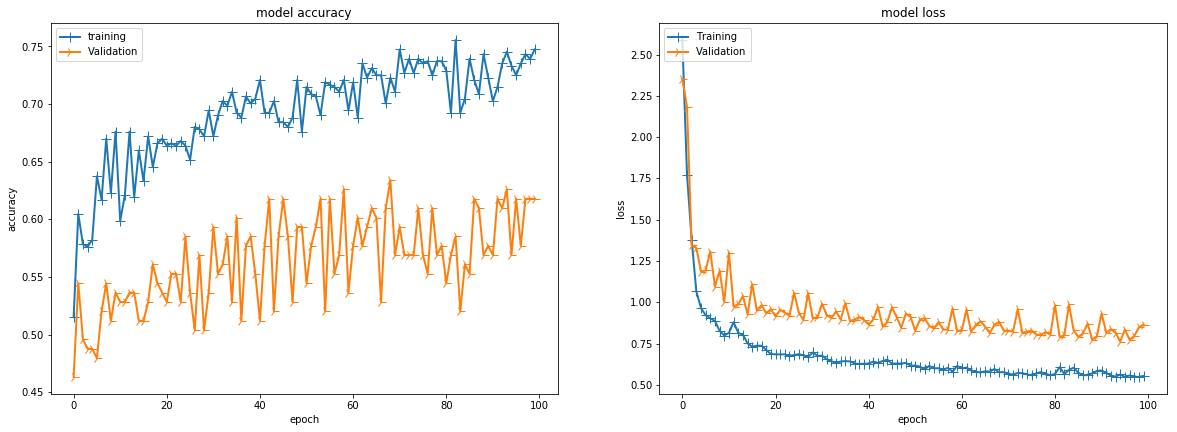

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
line1=plt.plot(history.history['accuracy'])
line2=plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['training', 'Validation'], loc='upper left')
#plt.show()

plt.subplot(2,2,2)
line1=plt.plot(history.history['loss'])
line2=plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.legend(['Training', 'Validation'], loc='upper left')
plt.savefig('../figures/nn_learning_curve.png', bbox_inches='tight')
#plt.show()

##  4.3. ROC and Precision recall curve

> A large AUC indicates that the model is able to differentiate the respective classes with high accuracy, while a low AUC indicates that the model makes poor, often wrong predictions. This shows that our model is able to differentiate samples of different classes, making good predictions.

0.4007527409589265 0.6466165413533834


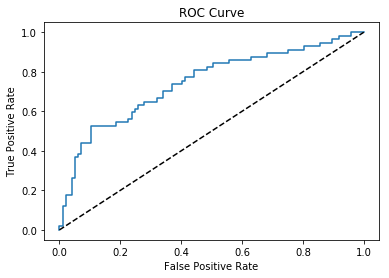

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
print(FPR.mean(), TPR.mean())

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('../figures/nn_roc_curve.png', bbox_inches='tight')

# 5. Prediction
+ Use testing set to make prediction

## 5.1. Confusion Matrix

In [21]:
from sklearn.metrics import accuracy_score
def pred_acc(model, X_test, y_test):
    pred =  np.argmax(model.predict(X_test), axis=-1)
    a = accuracy_score(pred,y_test)
    print('Prediction Accuracy is:', round(a*100, 2))

In [22]:
pred_acc(model, X_test, y_test)

Prediction Accuracy is: 62.99


## => Is model overfit with test set ? 

+ We get training accuracy **75.90%** of and testing accuracy of **63.64%**
+ **Meaning :**

## 5.2. Confusion Matrix

## 5.3. Model’s performance on test data in each epoch
> We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs.

In [23]:
'''history = model.fit(X_train, y_train,
                    validation_data = (X_test,y_test), 
                    epochs=100, 
                    batch_size=64)'''

'history = model.fit(X_train, y_train,\n                    validation_data = (X_test,y_test), \n                    epochs=100, \n                    batch_size=64)'

In [24]:
import random
def predict(n_row, model):
    features = X_test[:n_row]
    target = y_test[:n_row]
    pred_ = model.predict(features)
    pred =[]
    for i in range(len(pred_)):
        pred.append(np.argmax(pred_[i]))
    result = pd.DataFrame({'True':target, "predicted":pred})
    # update : select randomly
    return result

In [25]:
# Predict on the first 5 test images.
predict(10, model).T

,568,248,50,555,615,722,85,558,376,266
True,0,0,0,0,0,1,0,0,0,1
predicted,0,0,0,0,0,0,0,0,0,0


# 6. Save Model

In [26]:
filename = '../models/dl_diab_model'+'.h5'
model.save(filename)
print("Model saved .... ")

Model saved .... 


# 7. Deployment

In [27]:
# Load the model from disk later using:
from keras.models import load_model
loaded_model = load_model('../models/dl_diab_model.h5')
print("Model Loaded .... ")

Model Loaded .... 


## 7.1. Insert Features line by line

In [28]:
prediction(loaded_model) 

============WELCOME TO=============
        Diabetes Prediction     
 
Please Enter Predictor variables
--------------------------------
Enter Pregnancies : 6
Enter Glucose  : 6
Enter BloodPressure : 3
Enter SkinThickness  : 3
Enter Insulin : 3
Enter BMI  : 2
Enter DiabetesPedigreeFunction : 5
Enter Age  : 5
--------------------------------

Result : This Patient is Prediabetic
============THANK YOU=============


## 7.2. Insert Feature as a list

> ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',  'DiabetesPedigreeFunction', 'Age']

In [29]:
features = [1, 126, 60, 0, 0, 30.1, 0.349, 47]
prediction2(loaded_model, features)

This Patient is Prediabetic


## 7.3. Real world Deployement

For real world use the model trained in this project we be deploy as :
* **Web app** with flask, streamlit and Django framework
* **Docker container**
* **API**

In [ ]:
###############################################################
###############################################################

## 7. Further improvements

+ In general, any limitation in performance is usually due to the lack of strong features in the dataset, rather than the complexity of the neural network used.

+ One way to increase the number of features we provide to the model is via feature engineering. 

+ **Feature engineering** is the process of using one's domain knowledge of the problem to create new features for the machine learning algorithm. 

+ **feature selection**. Feature selection is used when we believe that the original dataset contains too much noise, and removing the noisy features or unimportant features (features that are not strong predictors) may improve model performance. 

+ Both method Feature engineering and feature selection can affect the performance of our model by adding noise or remove important features.

+ One popular way to do feature selection is to use decision trees.